# MNIST - Rede Neurais: Lenet X Linear

## Tratamento dos dados
Nessa seção instalamos as dependências e importamos o dataset, separando-o entre treino e teste, categorizando, normalizando-o e configurando o canal de cor.

In [13]:
# Instalação das depencias
!python3 -m pip install keras numpy matplotlib tensorflow jupyterlab np_utils opencv-python

  Using cached jupyterlab-4.2.2-py3-none-any.whl (11.6 MB)
  Using cached np_utils-0.6.0-py3-none-any.whl
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached ipykernel-6.29.4-py3-none-any.whl (117 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl (69 kB)
  Using cached jupyter_server-2.14.1-py3-none-any.whl (383 kB)
  Using cached jupyterlab_server-2.27.2-py3-none-any.whl (59 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
  Using cached jupyter_client-8.6.2-py3-none-any.whl (105 kB)
  Using cached jupyter_events-0.10.0-py3-none-any.whl (18 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl (13 kB)
  Using cached overrides-7.7.0-py3-none-any.whl (17 kB)
  Using cached json5-0.9.25-py3-none-any.whl (30 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached python

In [14]:
from keras.datasets import mnist

In [15]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [16]:
x_treino[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [17]:
y_teste[0]

7

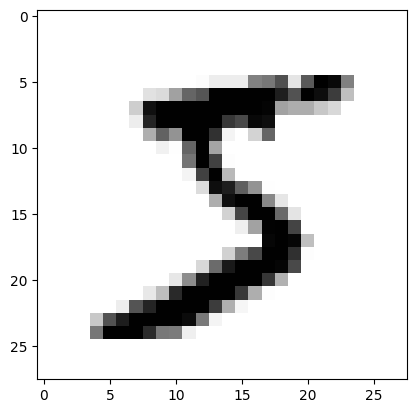

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_treino[0], cmap='gray_r')

In [19]:
from keras.utils import to_categorical
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

print(y_treino[0])
print(y_treino_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

In [21]:
x_treino_norm[0][0][0]
x_teste_norm[0][0][0]

0.0

In [22]:
x_treino = x_treino.reshape(len(x_treino), 28, 28, 1)
x_treino_norm = x_treino_norm.reshape(len(x_treino_norm), 28, 28, 1)
x_teste = x_teste.reshape(len(x_teste), 28, 28, 1)
x_teste_norm = x_teste_norm.reshape(len(x_teste_norm), 28, 28, 1)

## REDE CONVOLUCIONAL - LENET
Aqui implementamos a arquitetura de Rede Neural Convolucional Lenet, composta pelas camadas de Convolução, Pooling e as totalmente conectadas.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [24]:
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

historico = model.fit(x_treino_norm, y_treino_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 109s 70ms/step - loss: 0.1402 - accuracy: 0.9576 - val_loss: 0.0569 - val_accuracy: 0.9819
Epoch 2/5
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 3/5
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0424 - val_accuracy: 0.9884
Epoch 4/5
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0386 - val_accuracy: 0.9889
Epoch 5/5
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0314 - val_accuracy: 0.9918


Text(0, 0.5, 'acuracia')

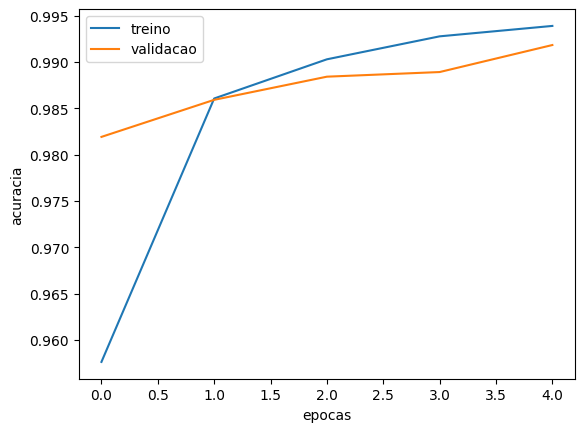

In [25]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

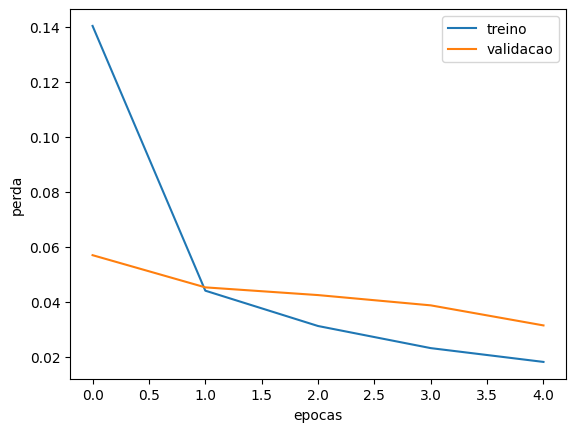

In [26]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

In [27]:
# Salva o modelo
model.save('pesos_convolucional.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Carrega o modelo
from tensorflow.keras.models import load_model
modelo_lenet = load_model('pesos_convolucional.h5')

In [36]:
# Realiza uma predição com o modelo
predicao = modelo_lenet.predict(x_teste_norm[0].reshape(1, 28, 28, 1))
print(predicao)
# Exibe a classe com a maior probabilidade de ser a correta da predição
import numpy as np
np.argmax(predicao)

1/1 [==============================] - 0s 108ms/step
[[4.1440691e-11 1.5346399e-09 8.1774951e-09 3.2571747e-11 3.1931172e-10
  2.2149799e-12 1.4060409e-15 9.9999952e-01 1.1952323e-11 5.0902975e-07]]


7

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

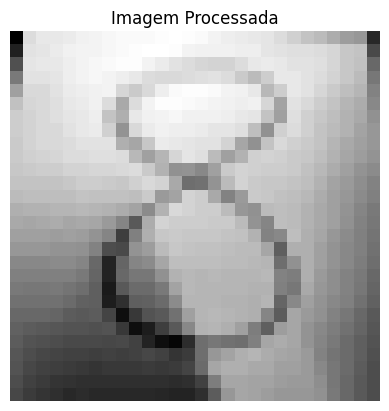

1/1 [==============================] - 0s 126ms/step
[[0.0731492  0.12774098 0.13792725 0.06780948 0.09620547 0.09556
  0.04137837 0.05642629 0.25061774 0.0531852 ]]
A classe predita é: 8


In [37]:
caminho_imagem = '/content/imagem.jpg'

# Carrega e processa a imagem
img = Image.open(caminho_imagem).convert('L')  # Converte para escala de cinza
img = img.resize((28, 28))  # Redimensiona para 28x28 pixels
img_array = np.array(img)  # Converte a imagem para um array do NumPy
img_array = img_array / 255.0  # Normaliza os valores dos pixels para [0, 1]
img_array = img_array.reshape(1, 28, 28, 1)  # Ajusta as dimensões para (1, 28, 28, 1)

# Exibe a imagem carregada
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Imagem Processada")
plt.axis('off')
plt.show()

# Realiza uma predição com o modelo
predicao = modelo_lenet.predict(img_array)
print(predicao)

# Exibe a classe com a maior probabilidade de ser a correta da predição
classe_predita = np.argmax(predicao)
print(f"A classe predita é: {classe_predita}")

## REDE NEURAL LINEAR
Diferente da convolucional, aqui apenas adicionamos as camadas totalmente conectadas.

In [38]:
x_treino_norm_linear = x_treino_norm.reshape(len(x_treino_norm), (28 * 28))
x_teste_norm_linear = x_teste_norm.reshape(len(x_teste_norm), (28 * 28))

In [39]:
model_linear = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_linear.build()
model_linear.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model_linear.save('pesos_linear.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
adam = Adam()
model_linear.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [41]:
historico_linear = model_linear.fit(x_treino_norm_linear, y_treino_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5471 - accuracy: 0.8808 - val_loss: 0.2140 - val_accuracy: 0.9443
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1579 - accuracy: 0.9566 - val_loss: 0.1336 - val_accuracy: 0.9636
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1027 - accuracy: 0.9718 - val_loss: 0.1118 - val_accuracy: 0.9677
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0743 - accuracy: 0.9796 - val_loss: 0.1052 - val_accuracy: 0.9678
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0582 - accuracy: 0.9836 - val_loss: 0.0954 - val_accuracy: 0.9717


Text(0, 0.5, 'acuracia')

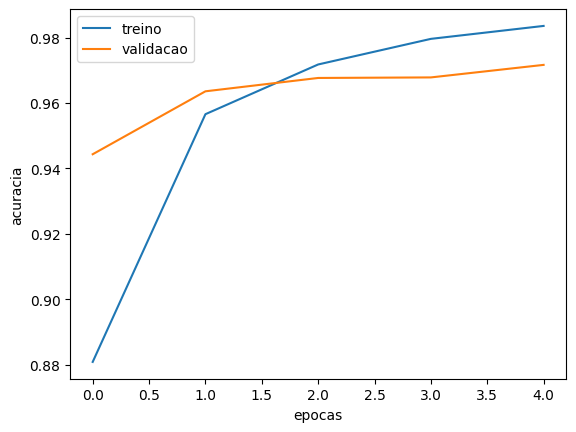

In [42]:
plt.plot(historico_linear.history['accuracy'])
plt.plot(historico_linear.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

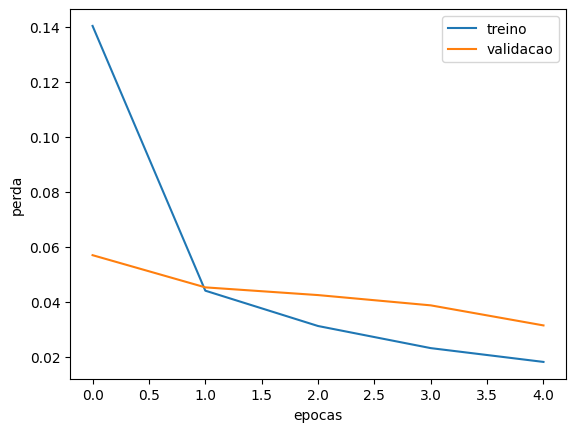

In [43]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

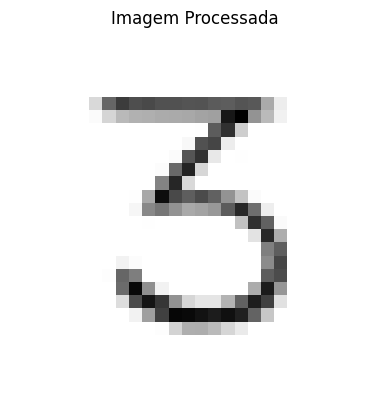

1/1 [==============================] - 0s 67ms/step
[[2.9362030e-02 1.8612380e-04 8.5617066e-05 9.9191125e-03 1.5547704e-03
  9.3941611e-01 4.6878327e-03 7.5230870e-04 1.1861461e-03 1.2849838e-02]]
A classe predita é: 5


In [62]:
caminho_imagem_linear = '/content/number3.png'
nn_linear = load_model('pesos_linear.h5')

img = Image.open(caminho_imagem_linear).convert('L')
img = img.resize((28, 28))
img_array = np.array(img)
img_array = img_array / 255.0
img_array = img_array.reshape(1, 784)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Imagem Processada")
plt.axis('off')
plt.show()

predicao_linear = nn_linear.predict(img_array)
print(predicao_linear)

classe_predita_linear = np.argmax(predicao_linear)
print(f"A classe predita é: {classe_predita_linear}")

## Comparação dos Modelos

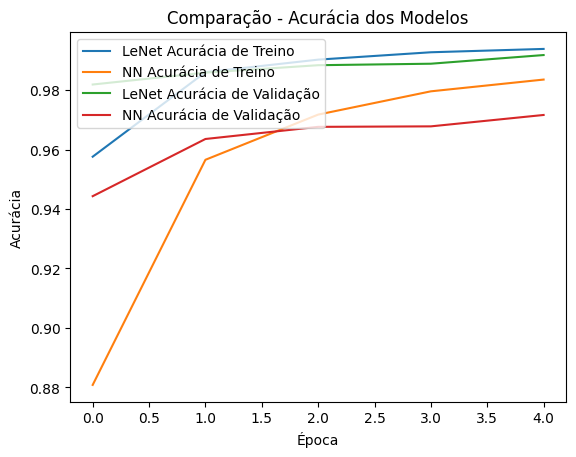

In [63]:
plt.plot(historico.history['accuracy'], label='LeNet Acurácia de Treino')
plt.plot(historico_linear.history['accuracy'], label='NN Acurácia de Treino')
plt.plot(historico.history['val_accuracy'], label='LeNet Acurácia de Validação')
plt.plot(historico_linear.history['val_accuracy'], label='NN Acurácia de Validação')
plt.title('Comparação - Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.show()

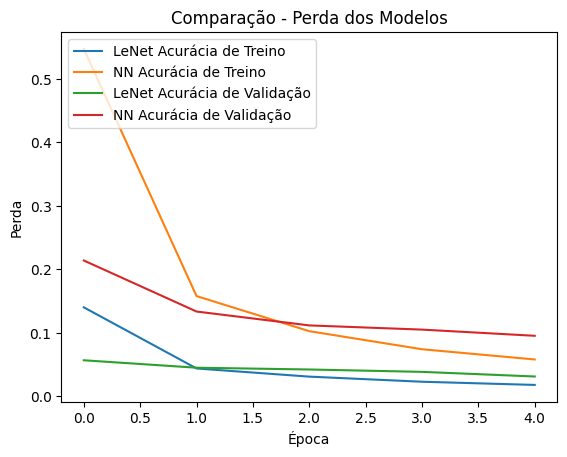

In [53]:
# Plot training accuracy
plt.plot(historico.history['loss'], label='LeNet Perda de Treino')
plt.plot(historico_linear.history['loss'], label='NN Perda de Treino')
plt.plot(historico.history['val_loss'], label='LeNet Perda de Validação')
plt.plot(historico_linear.history['val_loss'], label='NN Perda de Validação')
plt.title('Comparação - Perda dos Modelos')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.show()